In [1]:
import math 
def rgb2hsi(r,g,b):
    #归一化
    r = r/255.0
    g = g/255.0
    b = b/255.0
    #计算角度
    num = ((r-g)+(r-b))/2.0
    den = ((r-g)**2+(r-b)*(g-b))**0.5
    theta = math.acos(num/den)

    #hue 色调
    if den == 0:
        h = 0
    elif g < b:
        h = 2*math.pi - theta
    else:
        h = theta
    
    #饱和度
    sum_rgb= r+g+b
    if sum_rgb == 0:
        s = 0
    else:
        s = 1-(min(r,g,b)*3)/sum_rgb

    i = sum_rgb/3.0
    #亮度
    h = h / (2 * math.pi)
    h = int(h * 255)
    s = int(s * 255)
    i = int(i * 255)

    return (h,s,i)

<ipython-input-1-dcf30215f5f1>:10: RuntimeWarning: invalid value encountered in double_scalars
  theta = math.acos(num/den)


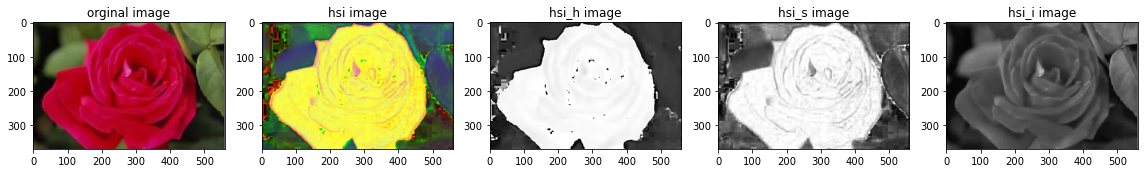

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img=io.imread('flower.jpg')
img_hsi = np.zeros_like(img,dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r,g,b=img[i,j,:]
        img_hsi[i,j] = rgb2hsi(r,g,b)
fig = plt.figure(figsize=(16,9))
org = fig.add_subplot(1,5,1)
org.imshow(img)
org.set_title("orginal image")
hsi = fig.add_subplot(1,5,2)
hsi.imshow(img_hsi)
hsi.set_title("hsi image")

hsi_h = fig.add_subplot(1,5,3)
hsi_h.imshow(img_hsi[:,:,0],cmap='gray')
hsi_h.set_title("hsi_h image")

hsi_s = fig.add_subplot(1,5,4)
hsi_s.imshow(img_hsi[:,:,1],cmap='gray')
hsi_s.set_title("hsi_s image")

hsi_i = fig.add_subplot(1,5,5)
hsi_i.imshow(img_hsi[:,:,2],cmap='gray')
hsi_i.set_title("hsi_i image")

plt.tight_layout()
plt.show()

<ipython-input-1-dcf30215f5f1>:10: RuntimeWarning: invalid value encountered in double_scalars
  theta = math.acos(num/den)


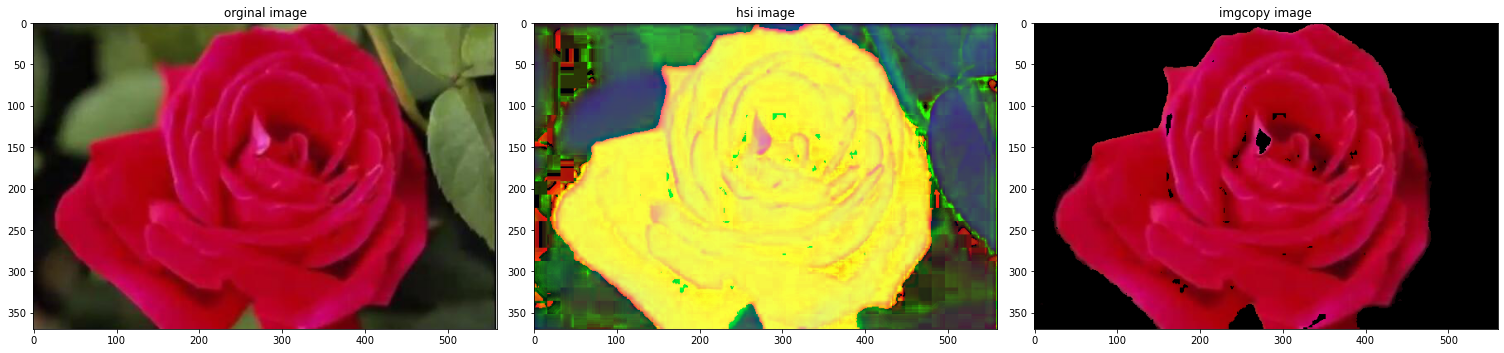

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img=io.imread('flower.jpg')
img_hsi = np.zeros_like(img,dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r,g,b=img[i,j,:]
        img_hsi[i,j] = rgb2hsi(r,g,b)
        h = img_hsi[:,:,0]

h=img_hsi[:,:,0]
s=img_hsi[:,:,1]

s_template = np.zeros_like(s, dtype=np.uint8)
h_template = np.zeros_like(h, dtype=np.uint8)

s_max =np.max(s)
h_max=np.max(h)

for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        if h[i,j]>(330/360.0)*h_max:
            h_template[i,j]=1
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        if s[i,j]>0.5*s_max:
            s_template[i,j]=1
template = np.bitwise_and(h_template,s_template)
img2 = np.copy(img) 
img2[:,:,0]=img2[:,:,0]*template
img2[:,:,1]=img2[:,:,1]*template
img2[:,:,2]=img2[:,:,2]*template

fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,3,1)
org.imshow(img)
org.set_title("orginal image")
hsi = fig.add_subplot(1,3,2)
hsi.imshow(img_hsi)
hsi.set_title("hsi image")
imgcopy = fig.add_subplot(1,3,3)
imgcopy.imshow(img2)
imgcopy.set_title("imgcopy image")

plt.tight_layout()
plt.show()